In [4]:
%matplotlib inline
#
from os import chdir, getcwd
ROOTF = 'LRG-Signed'
if getcwd()[-len(ROOTF):] != ROOTF:
    chdir('../')
print('cwd:', getcwd())
#
from src.LRGSG_package.LRGSG import *

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [110]:
side = 30
plotside = side if side < 10 else 10
#
theLattice = Lattice2D(#
    side1 = side,
    side2 = int(side * np.sqrt(3)),
    geometry = 'triangular',
)
plotlattice = Lattice2D(#
    side1 = plotside,
    side2 = int(plotside * np.sqrt(3)),
    geometry = 'triangular',
    pbc = False
)
SLRG_obj = SignedLaplacianAnalysis(#
    system = theLattice,
)

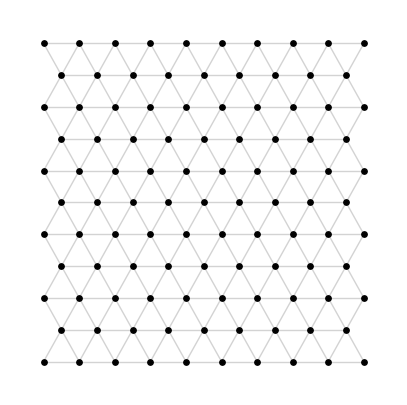

In [111]:
fig, ax = plt.subplots(figsize=(5, 5))
nx.draw(plotlattice.H, 
        pos=plotlattice.posH, 
        ax=ax,  
        edge_color='lightgray', 
        node_color='k',  
        node_size=15,
        with_labels=False)
plt.show()

In [112]:
SLRG_obj.laplacian_dynamics_init()
SLRG_obj.upd_graph_matrices()

In [113]:
SLRG_obj.run_laplacian_dynamics()

0 -0.9451211013188643 1.068693404207948
10 -0.9451211013189023 0.026775696863211598
20 -0.9451211013189396 0.011962749262560848
30 -0.945121101318978 0.007534326560256736
40 -0.9451211013190176 0.005422563207011362
50 -0.9451211013190576 0.004138459981246688
60 -0.9451211013190975 0.003255693036367413
70 -0.9451211013191377 0.002607238754371514
80 -0.9451211013191781 0.002111804188144748
90 -0.9451211013192188 0.0017237442328855818
100 -0.9451211013192596 0.001414741987612571
110 -0.9451211013193007 0.0011658872787154492
120 -0.9451211013193421 0.0009638393076133165
130 -0.9451211013193838 0.0007988001430872336
140 -0.9451211013194256 0.0006633615642146747
150 -0.9451211013194677 0.0005518030820932968
160 -0.9451211013195097 0.00045963850943017616
170 -0.9451211013195516 0.00038330822368185565
180 -0.9451211013195937 0.0003199619264457454
190 -0.9451211013196357 0.000267300549329958
200 -0.9451211013196776 0.00022345848531117108
210 -0.9451211013197196 0.00018691425581872928
220 -0.945

/tmp/ipykernel_6034/4228377741.py:16: RuntimeWarning: divide by zero encountered in log
  field = np.log(np.max(status_array)-status_array)


IndexError: index 780 is out of bounds for axis 0 with size 780

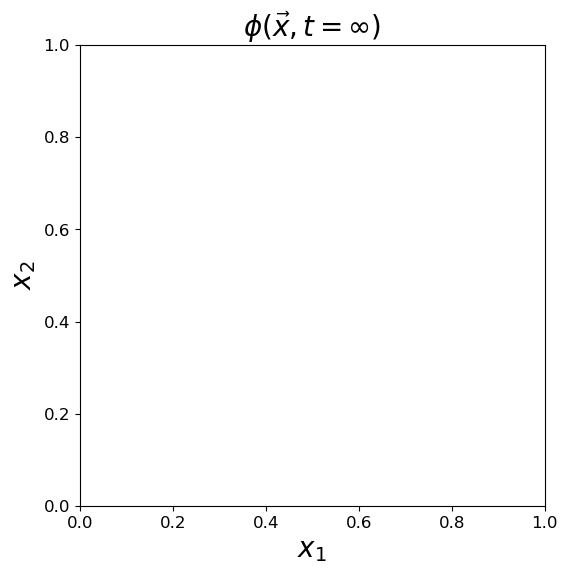

In [117]:
cax_dict = {"size": "5%", "pad":0.2}
axvline_cr = {"ls": ":", "color": "red"}
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
pos = nx.get_node_attributes(H, 'pos')

x, y = np.array([i[1] for i in list(pos.items())]).T
fig, ax1 = plt.subplots(figsize=(6, 6*np.max(y)/np.max(x)))
#

ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.set_title(r"$\phi(\vec{x}, t=\infty)$")
#
# phi_plot = status_array
status_array = np.abs(status_array)
field = np.log(np.max(status_array)-status_array)
# phi_plot = np.log10(np.max(status)-status)
# phi_plot_nnans = phi_plot[(phi_plot != np.inf) & (phi_plot != -np.inf)]
# phi_plot = n# parameters

im1 = ax1.hexbin(x, y, C=field, cmap=plt.cm.hot, gridsize=70, edgecolor = "k", lw=.2)
#
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", **cax_dict)
clb = fig.colorbar(im1, cax=cax)
#
# circ = Circle((L//2,L//2),critrad, alpha=0.5, lw=2)
# ax1.add_patch(circ)
# circ = Circle((L//2,L//2),25, ls='--', lw=1, color='k', fill=False)
# ax1.add_patch(circ)
# circ = Circle((L//2,L//2),1.0187186, alpha=0.5, lw=2, color='red')
# ax1.add_patch(circ)

fig.tight_layout(pad=5.0)
fig.savefig(r"ball.pdf", bbox_inches='tight', transparent=True
            )

In [5]:
# parameters
initial_cond = 'gauss_1'
BC_choice = 'PBC'
#
L = 10
t_steps = 10
no_obs = 5
fbc_val = 1
#
Deltat = 1/t_steps
simulationTime = L**2*t_steps
sampling = 1*t_steps
frames = simulationTime // sampling
#
frames_dynsys = []

In [6]:
G = nx.triangular_lattice_graph(L, L, periodic=False, with_positions=True)
nN = G.nodes().__len__()
neg_weightsH = {(nN//2, nN//2+1): -1}
#
nx.set_edge_attributes(G, values=1, name='weight')

H = nx.convert_node_labels_to_integers(G)
nx.set_edge_attributes(H, values=neg_weightsH, name='weight')

In [7]:
# parameters
initial_cond = 'gauss_1'
BC_choice = 'PBC'
#
L = 80
t_steps = 10
no_obs = 5
fbc_val = 1
#
Deltat = 1/t_steps
simulationTime = L**2*t_steps
sampling = 1*t_steps
frames = simulationTime // sampling
#
frames_dynsys = []

In [8]:
G = nx.triangular_lattice_graph(L, int(L*np.sqrt(3)), periodic=False, with_positions=True)
nN = G.nodes().__len__()
neg_weightsH = {(nN//2, nN//2+1): -1}
# neg_weightsH = {(663, 690): -1}
fraction_to_flip = 0.07
#
nx.set_edge_attributes(G, values=1, name='weight')
# flip_random_fract_edges(G, fraction_to_flip)
H = nx.convert_node_labels_to_integers(G)
nx.set_edge_attributes(H, values=neg_weightsH, name='weight')

In [9]:
adj = nx.adjacency_matrix(H).toarray()
dia = np.diag(adj.sum(axis=1))
lapl = dia - adj
diabs = np.diag(np.abs(adj).sum(axis=1))
slapl = diabs - adj
eigv, eigV = np.linalg.eigh(slapl)

In [10]:
status_array = np.random.normal(0, 1, H.number_of_nodes())

In [11]:
# status_array = status_array/status_array.sum()
for t in range(250):
    if (t % sampling == 0):
        print(t, np.mean(status_array), np.var(status_array))
    status_array = status_array - Deltat*((slapl - eigv[0])@status_array) #+ np.sqrt(Deltat)*np.random.uniform(-1e-3, 1e-3, L**2)

0 0.009641607166054961 1.0199712182320264
10 0.043700226002569134 0.0222141751413567
20 0.20095187364732606 0.010728644889985562
30 0.9245957022213933 0.007078988840717076
40 4.254543119135715 0.005886792970859172
50 19.577663508171483 0.017845766844485578
60 90.0886205011585 0.29747778399896285
70 414.55218346928064 6.254603660832098
80 1907.6052554793591 132.49143448285147
90 8778.045333091357 2805.870892384359
100 40393.09486812528 59415.403259691084
110 185873.05622611684 1258114.4863189554
120 855314.33396124 26640309.946001533
130 3935818.4814137346 564102457.4263535
140 18111080.92500466 11944738109.227518
150 83340035.57868923 252927037398.54196
160 383497901.58956695 5355670856149.544
170 1764705756.3917387 113405077491527.4
180 8120478348.731801 2401325985528585.5
190 37367231547.45795 5.0847515966179416e+16
200 171949229288.86343 1.07668425506425e+18
210 791242386139.4033 2.279853721607528e+19
220 3640984703524.4424 4.827536919460558e+20
230 16754372419279.617 1.022219648913

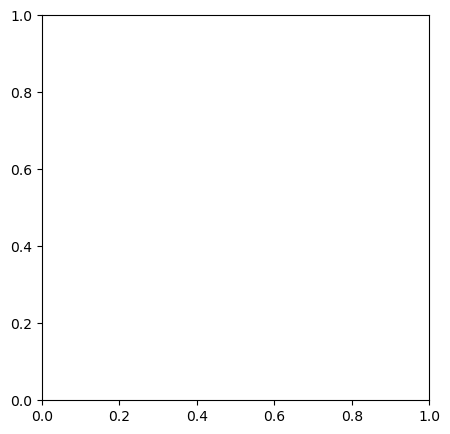

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))
pos = nx.get_node_attributes(H, 'pos')
# Pass the positions while drawing
Hedges = list(H.edges(data=True))
Gedges = list(G.edges(data=True))

edge_colorH = ['red' if d['weight'] == -1 else 'black' for u,v,d in Hedges]
# nx.draw(H, pos=pos, ax=ax,  with_labels=False, node_size=20, edge_color = edge_colorH)

/tmp/ipykernel_5921/761584243.py:16: RuntimeWarning: divide by zero encountered in log
  field = np.log(np.max(status_array)-status_array)


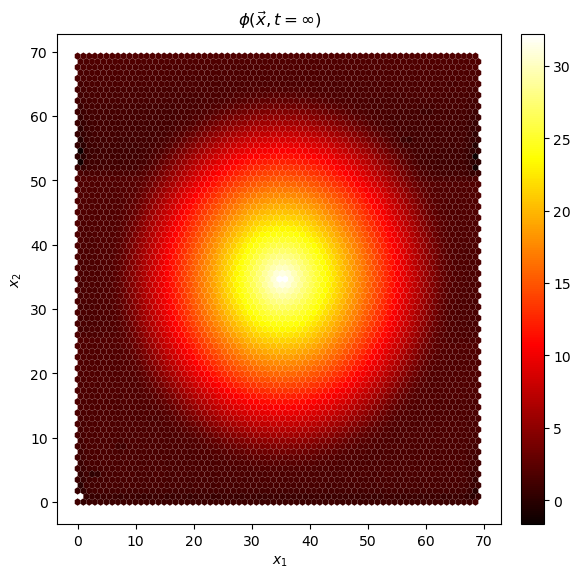

In [40]:
cax_dict = {"size": "5%", "pad":0.2}
axvline_cr = {"ls": ":", "color": "red"}
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
pos = nx.get_node_attributes(H, 'pos')

x, y = np.array([i[1] for i in list(pos.items())]).T
fig, ax1 = plt.subplots(figsize=(7, 7*np.max(y)/np.max(x)))
#

ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.set_title(r"$\phi(\vec{x}, t=\infty)$")
#
# phi_plot = status_array
status_array = np.abs(status_array)
field = np.log(np.max(status_array)-status_array)
# phi_plot = np.log10(np.max(status)-status)
# phi_plot_nnans = phi_plot[(phi_plot != np.inf) & (phi_plot != -np.inf)]
# phi_plot = n# parameters

im1 = ax1.hexbin(x, y, C=field, cmap=plt.cm.hot, gridsize=70, edgecolor = "w", lw=.01)
#
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", **cax_dict)
clb = fig.colorbar(im1, cax=cax)
#
# circ = Circle((L//2,L//2),critrad, alpha=0.5, lw=2)
# ax1.add_patch(circ)
# circ = Circle((L//2,L//2),25, ls='--', lw=1, color='k', fill=False)
# ax1.add_patch(circ)
# circ = Circle((L//2,L//2),1.0187186, alpha=0.5, lw=2, color='red')
# ax1.add_patch(circ)

fig.tight_layout(pad=5.0)
fig.savefig(r"ball.pdf", bbox_inches='tight', transparent=True
            )

-1.0733106226810398

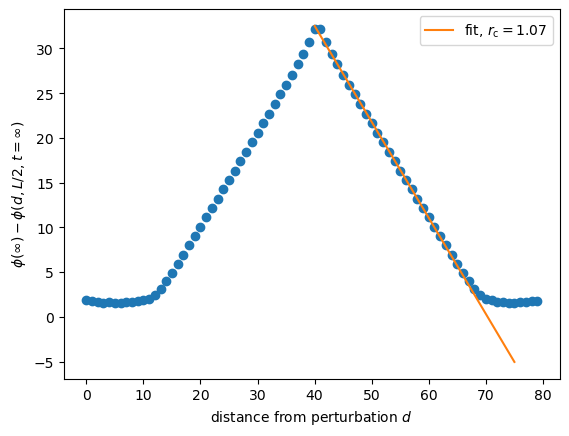

In [50]:
starr0 = field[nN//2-L//2:nN//2+L//2]
starr = field[nN//2+1:nN//2+L//2]
x = np.array(list(range(0, len(starr0))))
params, cov = curve_fit(line, x[40:65], starr0[40:65])
plt.plot(starr0, 'o')
plt.plot(x[40:76], line(x[40:76], *params), label=rf"fit, $r_{{\rm c}} = {np.abs(params[0]):.2f}$")
plt.xlabel(r"distance from perturbation $d$")
plt.legend()
plt.ylabel(r"$\phi(\infty) - \phi(d, L/2, t=\infty)$", color='black')

params[0]

-0.848325259225257

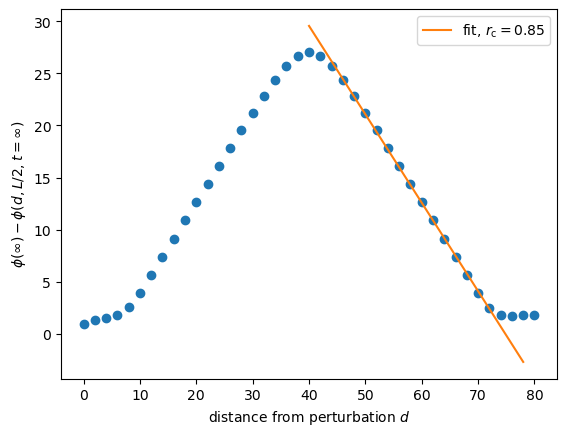

In [44]:
column_index = 40  # Half of the horizontal length

# Extract the indices of nodes belonging to the same column
column_indices = np.array([node_id for node_id, pos in nx.get_node_attributes(H, 'pos').items() if pos[0] == column_index])
x = np.array(list(range(0, 2*len(field[column_indices]), 2)))
plt.plot(x, field[column_indices], 'o')

params, cov = curve_fit(line, x[22:37], field[column_indices][22:37])

plt.plot(x[20:40], line(x[20:40], *params),  label=rf"fit, $r_{{\rm c}} = {np.abs(params[0]):.2f}$")
plt.xlabel(r"distance from perturbation $d$")
plt.legend()
plt.ylabel(r"$\phi(\infty) - \phi(d, L/2, t=\infty)$", color='black')
params[0]

In [36]:
np.sqrt(3)/2

0.8660254037844386

In [45]:
if initial_cond == 'uniform_1':
    status_array = np.random.uniform(-1, 1, nN)#np.ones(L**2)
elif initial_cond == 'delta_1':
    status_array = np.zeros(L**2)
    status_array[L**2//2] = L**2
elif initial_c# parameters
initial_cond = 'gauss_1'
BC_choice = 'PBC'
#
L = 100
t_steps = 10
no_obs = 5
fbc_val = 1
#
Deltat = 1/t_steps
simulationTime = L**2*t_steps
sampling = 1*t_steps
frames = simulationTime // sampling
#
frames_dynsys = []ond == 'gauss_1':
    status_array = np.random.normal(0, 1, nN)
elif initial_cond.startswith('ground_state'):
    eigenMode = int(initial_cond.split('_')[-1])
#
if BC_choice == 'FBC':
    # fixed_border_idxs = np.array(list(set(
    #                   np.concatenate([[i for i in range(L)], 
    #                         [i for i in range(L**2) if i % L ==0], 
    #         # parameters
initial_cond = 'gauss_1'
BC_choice = 'PBC'
#
L = 100
t_steps = 10
no_obs = 5
fbc_val = 1
#
Deltat = 1/t_steps
simulationTime = L**2*t_steps
sampling = 1*t_steps
frames = simulationTime // sampling
#
frames_dynsys = []                [i for i in range(L**2) if (i+1) % (L) ==0],
    #                         [i for i in range(L**2-L, L**2)]]))))
    fixed_border_idxs = np.array(sorted([i for i in range(L)] + \
                [(L-1) * L + i for i in range(L)] + \
                [i * L for i in range(1, L-1)] + 
                [(i+1) * L - 1 for i in range(1, L-1)]))
    status_array[fixed_border_idxs] = fbc_val

In [25]:
# status_array = status_array/status_array.sum()
for t in range(250):
    status_array_old = status_array
    if (t % sampling == 0):
        print(t, np.mean(status_array), np.var(status_array))
    status_array = status_array - Deltat*((slapl - eigv[0])@status_array) #+ np.sqrt(Deltat)*np.random.uniform(-1e-3, 1e-3, L**2)
    if BC_choice == 'FBC':
        status_array[fixed_border_idxs] = fbc_val
    # if (np.abs(status_array_old - status_array) < 1e-7*np.ones(L**2)).all():
    #     print('Convergence rea\ched')
    #     break

0 0.9762380122754679 9.180842436526297e-05


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 780 is different from 66)

In [7]:
plt.rc('font', size=12)
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=20)
cax_dict = {"size": "5%", "pad":0.2}
axvline_cr = {"ls": ":", "color": "red"}
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
x, y = np.array([i[1] for i in list(pos.items())]).T
fig, ax1 = plt.subplots(figsize=(6, 6*np.max(y)/np.max(x)))
#

ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.set_title(r"$\phi(\vec{x}, t=\infty)$")
#
# phi_plot = status_array
status_array = np.abs(status_array)
field = np.log(np.max(status_array)-status_array)
# phi_plot = np.log10(np.max(status)-status)
# phi_plot_nnans = phi_plot[(phi_plot != np.inf) & (phi_plot != -np.inf)]
# phi_plot = n# parameters
initial_cond = 'gauss_1'
BC_choice = 'PBC'
#
L = 100
t_steps = 10
no_obs = 5
fbc_val = 1
#
Deltat = 1/t_steps
simulationTime = L**2*t_steps
sampling = 1*t_steps
frames = simulationTime // sampling
#
frames_dynsys = []#p.nan_to_num(phi_plot, posinf=np.max(phi_plot_nnans), neginf=np.min(phi_plot_nnans))
im1 = ax1.hexbin(x, y, C=field, cmap=plt.cm.hot, gridsize=50, edgecolor = "k", lw=.2)
#
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", **cax_dict)
clb = fig.colorbar(im1, cax=cax)
#
# circ = Circle((L//2,L//2),critrad, alpha=0.5, lw=2)
# ax1.add_patch(circ)
# circ = Circle((L//2,L//2),25, ls='--', lw=1, color='k', fill=False)
# ax1.add_patch(circ)
# circ = Circle((L//2,L//2),1.0187186, alpha=0.5, lw=2, color='red')
# ax1.add_patch(circ)

fig.tight_layout(pad=5.0)
fig.savefig(r"ball.pdf", bbox_inches='tight', transparent=True
            )

NameError: name 'pos' is not defined

In [50]:
starr = field[nN//2:nN//2+26]

-1.0645685120657409

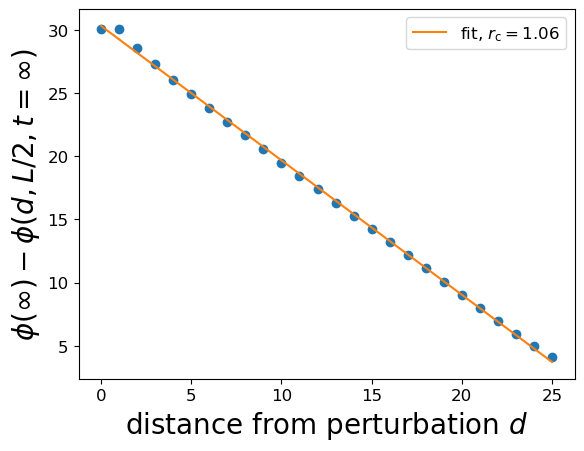

In [52]:
plt.plot(starr, 'o')
x = np.array(list(range(0, len(starr))))
params, cov = curve_fit(line, x, starr)
plt.plot(x, line(x, *params), label=rf"fit, $r_{{\rm c}} = {np.abs(params[0]):.2f}$")
plt.xlabel(r"distance from perturbation $d$")
plt.legend()
plt.ylabel(r"$\phi(\infty) - \phi(d, L/2, t=\infty)$", color='black')

params[0]

-1.8427517581899315

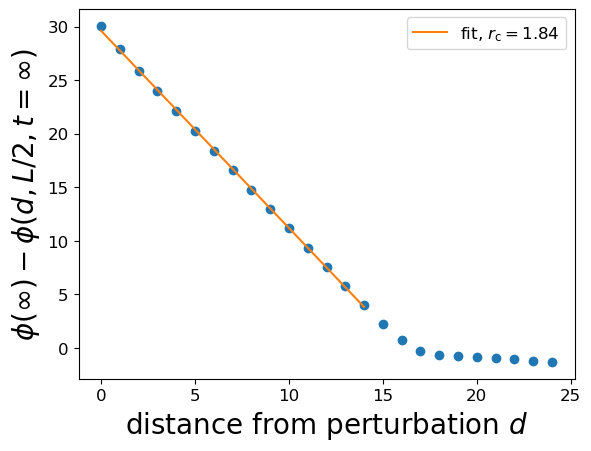

In [60]:
column_index = 25  # Half of the horizontal length

# Extract the indices of nodes belonging to the same column
column_indices = np.array([node_id for node_id, pos in nx.get_node_attributes(H, 'pos').items() if pos[0] == column_index])
plt.plot(field[column_indices][25:50], 'o')
x = np.array(list(range(0, len(field[column_indices][25:40]))))

params, cov = curve_fit(line, x, field[column_indices][25:40])

plt.plot(x, line(x, *params),  label=rf"fit, $r_{{\rm c}} = {np.abs(params[0]):.2f}$")
plt.xlabel(r"distance from perturbation $d$")
plt.legend()
plt.ylabel(r"$\phi(\infty) - \phi(d, L/2, t=\infty)$", color='black')
params[0]

In [459]:
plt.plot(field[column_indices])


IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
status_array

array([-1.62122488e+25, -1.62093189e+25, -1.62045759e+25, -1.61991660e+25,
       -1.61957730e+25, -1.61961113e+25, -1.62067771e+25, -1.61988154e+25,
       -1.61856923e+25, -1.61733889e+25, -1.61697143e+25, -1.61788810e+25,
       -1.62029675e+25, -1.61900747e+25, -1.61584468e+25, -1.61128331e+25,
       -1.60831126e+25, -1.60888788e+25, -1.61831947e+25, -1.61329774e+25,
       -1.60033164e+25, -1.58455449e+25, -1.58153198e+25, -1.59170783e+25,
       -1.61829114e+25, -1.61346105e+25, -1.59451194e+25, -1.53561241e+25,
       -1.48860094e+25, -1.51881298e+25, -1.61578729e+25, -1.60260840e+25,
       -1.54204948e+25, -1.21411062e+25, -1.20386258e+25, -1.50182318e+25,
       -1.61829114e+25, -1.61346105e+25, -1.59451194e+25, -1.53561241e+25,
       -1.48860094e+25, -1.51881298e+25, -1.61831947e+25, -1.61329774e+25,
       -1.60033164e+25, -1.58455449e+25, -1.58153198e+25, -1.59170783e+25,
       -1.62029675e+25, -1.61900747e+25, -1.61584468e+25, -1.61128331e+25,
       -1.60831126e+25, -

In [ ]:
triangular_array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Define the dimensions of the triangular grid
n = 3  # Number of rows in the grid
m = 4  # Number of columns in the grid

# Calculate the index of the vertical line at half of the horizontal length
line_index = m // 2

# Calculate the index range of the elements passing through the vertical line
start_index = line_index * (n - 1)
end_index = (line_index + 1) * (n - 1) + 1

# Extract the elements passing through the vertical line
line_elements = triangular_array[start_index:end_index]


In [ ]:
line_elements
plt.hexbin(x, y, C=triangular_array, cmap=plt.cm.hot, gridsize=50)

array([5, 6, 7])

In [ ]:
# Assuming you have a 1D array representing the elements on a triangular lattice
triangular_array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Define the dimensions of the triangular grid
n = 3  # Number of rows in the grid
m = 4  # Number of columns in the grid

# Calculate the index of the vertical line at half of the horizontal length
line_index = m // 2

# Calculate the number of elements in the rows above the vertical line
elements_above_line = (n - 1) * line_index

# Calculate the number of elements in the rows below the vertical line
elements_below_line = (n - 1) * (m - line_index)

# Calculate the start index of the elements passing through the vertical line
start_index = elements_above_line + elements_below_line

# Calculate the end index of the elements passing through the vertical line
end_index = start_index + n

# Extract the elements passing through the vertical line
line_elements = triangular_array[start_index:end_index]



[ 9 10 11]


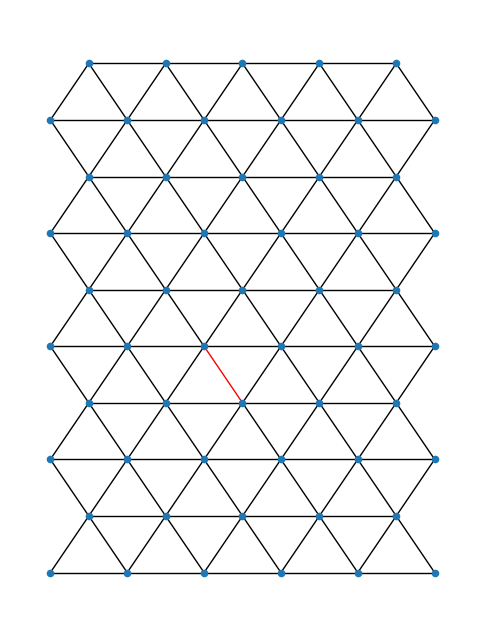

In [ ]:
L = 9
LL = 9
G = nx.triangular_lattice_graph(L, LL, periodic=False, with_positions=True, create_using=None)
Gg = nx.convert_node_labels_to_integers(G)
fig, ax = plt.subplots(figsize=(6, 8))
pos = nx.get_node_attributes(Gg, 'pos')
neg_weightsGg = {(19, 24): -1}
nx.set_edge_attributes(Gg, values=1, name='weight')
nx.set_edge_attributes(Gg, values=neg_weightsGg, name='weight')
Ggedges = list(Gg.edges(data=True))
edge_colorGg = ['red' if d['weight'] == -1 else 'black' for u,v,d in Ggedges]
nx.draw(Gg, pos=pos, ax=ax,  with_labels=False, node_size=20, edge_color=edge_colorGg)

In [ ]:
column_indices = [node_id for node_id, pos in nx.get_node_attributes(Gg, 'pos').items() if pos[0] == 2]
column_indices

[2, 13, 24, 35, 46]

[4, 15, 26, 37, 48]


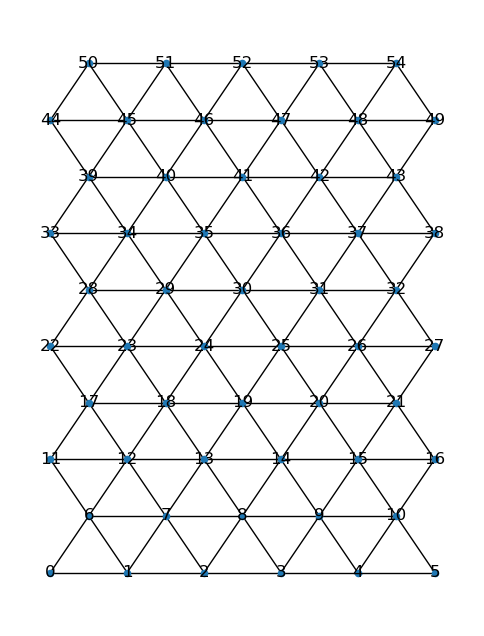

In [ ]:
# Assuming you have created a triangular grid using networkx
n = 3  # Number of rows in the grid
m = 4  # Number of columns in the grid
G = nx.triangular_lattice_graph(n, m)

# Define the column index you want to extract
column_index = L // 2  # Half of the horizontal length

# Extract the indices of nodes belonging to the same column
column_indices = [node_id for node_id, pos in nx.get_node_attributes(Gg, 'pos').items() if pos[0] == column_index]

print(column_indices)
pos = nx.get_node_attributes(Gg, 'pos')
fig, ax = plt.subplots(figsize=(6, 8))

nx.draw(Gg, pos=pos, ax=ax,  with_labels=True, node_size=20)

In [ ]:
column_index

2

In [ ]:
nx.get_node_attributes(Gg, 'pos').items()

dict_items([(0, (0.0, 0.0)), (1, (1.0, 0.0)), (2, (2.0, 0.0)), (3, (3.0, 0.0)), (4, (4.0, 0.0)), (5, (5.0, 0.0)), (6, (0.5, 0.8660254037844386)), (7, (1.5, 0.8660254037844386)), (8, (2.5, 0.8660254037844386)), (9, (3.5, 0.8660254037844386)), (10, (4.5, 0.8660254037844386)), (11, (0.0, 1.7320508075688772)), (12, (1.0, 1.7320508075688772)), (13, (2.0, 1.7320508075688772)), (14, (3.0, 1.7320508075688772)), (15, (4.0, 1.7320508075688772)), (16, (5.0, 1.7320508075688772)), (17, (0.5, 2.598076211353316)), (18, (1.5, 2.598076211353316)), (19, (2.5, 2.598076211353316)), (20, (3.5, 2.598076211353316)), (21, (4.5, 2.598076211353316)), (22, (0.0, 3.4641016151377544)), (23, (1.0, 3.4641016151377544)), (24, (2.0, 3.4641016151377544)), (25, (3.0, 3.4641016151377544)), (26, (4.0, 3.4641016151377544)), (27, (5.0, 3.4641016151377544)), (28, (0.5, 4.330127018922193)), (29, (1.5, 4.330127018922193)), (30, (2.5, 4.330127018922193)), (31, (3.5, 4.330127018922193)), (32, (4.5, 4.330127018922193)), (33, (0.0